In [1]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import time
import seaborn as sns

from impulseest import impulseest, whiten
from random import choice

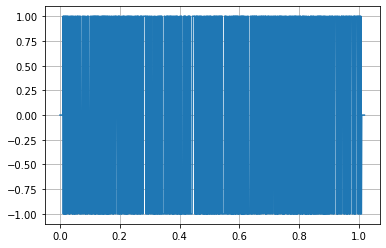

In [2]:
#---------------------------------------------------------------
#signal---------------------------------------------------------
#---------------------------------------------------------------
N = 1000
Ta = 1*10**(-3)

#creating prbs signal
def prbs():
    while True:
        yield choice([False,True])

r = np.zeros(N)
i = 0
for value in prbs():
    r[i] = value
    i = i+1
    if i==N:
        break

r = 2*r-1

r = np.concatenate((np.zeros(10), r, np.zeros(10)))
t = np.linspace(0,(N+20-1)*Ta,N+20)

plt.figure()
plt.plot(t,r)
plt.grid()
plt.show()


G = TransferFunctionDiscrete(
array([-0.2 ,  0.24]),
array([ 1.  , -0.96]),
dt: 0.001
)


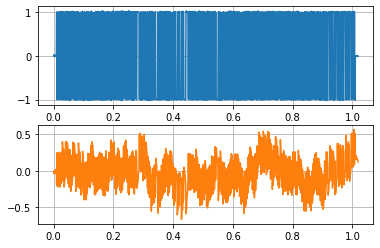

In [3]:
#---------------------------------------------------------------
#plant----------------------------------------------------------
#---------------------------------------------------------------
z1g = 1.2
p1g = 0.96
numG2 = np.dot(-1,[1,-z1g])
denG2 = [1,-p1g]
evalg = sum(numG2)/sum(denG2)
numG2 = np.dot(numG2,(1/evalg))
G = ss.TransferFunction(numG2,denG2,dt=Ta)

print("\nG =",G)

u = r
t,y = ss.dlsim(G,u,t)

nu = 0.1*np.random.normal(0, .1, u.shape)
ny = 0.2*np.random.normal(0, .1, y.shape)

u = u + nu
y = y + ny

fig,axs = plt.subplots(2,1)
axs = axs.reshape(-1)
axs[0].plot(t,u,color='C0')
axs[1].plot(t,y,color='C1')
axs[0].grid()
axs[1].grid()
plt.show()


In [7]:
u = u.reshape(len(u),1)
y = y.reshape(len(y),1)

u_filtered = whiten(u)
y_filtered = whiten(y)

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].plot(t,u,color='C0')
axs[1].plot(t,u_filtered,color='C0')
axs[2].plot(t,y,color='C1')
axs[3].plot(t,y_filtered,color='C1')
axs[0].set_title("Input signal")
axs[1].set_title("Filtered input signal")
axs[2].set_title("Output signal")
axs[3].set_title("Filtered output signal")
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axs[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()
fig.suptitle('Signals in time')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1020,) and (1, 1020)

In [ ]:
Uf = abs(fft.fft(u))
Yf = abs(fft.fft(y))
Uf_filtered = abs(fft.fft(u_filtered))
Yf_filtered = abs(fft.fft(y_filtered))
N = len(Uf)
sampling_rate = 1/Ta
freq = fft.fftfreq(len(Uf),Ta)
beg = 0
end = int(len(Uf)/2)

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].plot(freq[beg:end],Uf[beg:end],color='C0')
axs[1].plot(freq[beg:end],Uf_filtered[beg:end],color='C0')
axs[2].plot(freq[beg:end],Yf[beg:end],color='C1')
axs[3].plot(freq[beg:end],Yf_filtered[beg:end],color='C1')
axs[0].set_title("Input signal")
axs[1].set_title("Filtered input signal")
axs[2].set_title("Output signal")
axs[3].set_title("Filtered output signal")
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axs[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()
fig.suptitle('Signal spectrum [absolute]')
plt.show()

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(u[:, 0], u[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');



In [ ]:
start_time = time.time()
ir_est = impulseest(u,y,n=100,RegularizationKernel='DC')
end_time = time.time()
t,ir_real = ss.dimpulse(G, n=100)

print("Function took {:.2f} seconds to solve minimization with regularization by the Empirical Bayes approach." .format(end_time-start_time))
ir_real = np.squeeze(ir_real)
sub = np.zeros(len(ir_est))
for i in range(len(ir_est)):
    sub[i] = (ir_real[i]-ir_est[i])**2
square = np.square(sub)
summer = np.sum(square)
mse = (1/len(ir_est))*summer
print("An MSE of {} was obtained using {} kernel." .format(mse,'DC'))

plt.plot(np.squeeze(ir_real),color='C0')
plt.plot(ir_est,linestyle='--',color='C1')
plt.legend(['Real IR','Estimated IR'])
plt.grid()
plt.show()

In [ ]:
import os
os._exit(00)